In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

from scipy.stats import kstest, spearmanr, mannwhitneyu, ttest_ind, levene, kruskal, pearsonr

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error 
import statsmodels.api as sm

In [2]:
data = pd.read_csv('filled_correctly_to_knn.csv',index_col=0)

In [3]:
data.rename(columns={'0':'price_per_square','1':'squares','2':'max_floor','3':'latitude','4':'longitude','5':'Nevskii prospekt',
                     '6':'parkings_1km','7':'rent_per_m'},inplace=True)

In [4]:
data.describe()

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,8
count,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000
mean,251840.213202,92.894978,9.297347,30.319440,59.928099,8.471289,44.637261,172983.700062,1.506477
std,73476.764815,45.905986,7.842456,0.090560,0.077891,6.785169,22.619268,93093.757030,0.500112
min,33750.000000,4.000000,1.000000,29.766935,59.702404,0.120000,1.000000,20000.000000,1.000000
25%,204869.600000,58.000000,3.000000,30.274698,59.880582,3.590000,27.000000,101418.000000,1.000000
50%,253343.200000,86.000000,6.000000,30.326055,59.933190,7.000000,41.000000,152640.000000,2.000000
75%,299726.000000,123.600000,14.000000,30.371330,59.982154,11.660000,59.000000,228240.000000,2.000000
max,450000.000000,200.000000,28.000000,30.583368,60.110679,62.310000,125.000000,450000.000000,2.000000


In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [6]:

X = data[['price_per_square','squares', 'max_floor',
       'latitude', 'longitude','Nevskii prospekt','parkings_1km','rent_per_m']]
y = data[['8']]


In [7]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=99)


In [8]:
# Создание экземпляра классификатора KNN
knn = KNeighborsClassifier(n_neighbors=10)

# Обучение модели
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [9]:
# Предсказание на тестовых данных
y_pred = knn.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of KNN classifier on test set: {accuracy:.2f}')


Accuracy of KNN classifier on test set: 0.64


In [10]:
from sklearn.metrics import confusion_matrix, classification_report

# Получение матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[220 116]
 [118 195]]


In [11]:
# Вывод отчета о классификации
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)



Classification Report:
              precision    recall  f1-score   support

         1.0       0.65      0.65      0.65       336
         2.0       0.63      0.62      0.62       313

    accuracy                           0.64       649
   macro avg       0.64      0.64      0.64       649
weighted avg       0.64      0.64      0.64       649



In [12]:
data = data[['price_per_square', 'squares', 'max_floor',
       'latitude', 'longitude','Nevskii prospekt','parkings_1km','rent_per_m']]

In [13]:
data = data[data['price_per_square']>= 30000.0]

In [14]:
Q1 = data['price_per_square'].quantile(0.05)
Q3 = data['price_per_square'].quantile(0.95)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['price_per_square'] >= lower_bound) & (data['price_per_square'] <= upper_bound)]

# Строим Лес

In [15]:
df_1 = data.copy()

In [16]:
X = df_1[['squares', 'max_floor',
       'latitude', 'longitude','Nevskii prospekt','parkings_1km','rent_per_m']]
y = df_1['price_per_square']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 999)

In [18]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

0.9065808553120336

In [19]:
predictions1 = rfc.predict(X_train)
#Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_train, predictions1))
print(rmse)
print(mean_absolute_error(y_train, predictions1))
print(mean_absolute_percentage_error(y_train, predictions1))

22477.019001872224
16703.035778769838
0.08567342973365782


In [20]:
predictions2 = rfc.predict(X_test)
#Calculate the root mean squared error
display(rfc.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, predictions2))
print(rmse)
print(mean_absolute_error(y_test, predictions2))
print(mean_absolute_percentage_error(y_test, predictions2))

0.38510718058491444

57330.80026447673
42579.60992761904
0.21362320884284958


In [21]:
from sklearn.ensemble import ExtraTreesRegressor

rfc = ExtraTreesRegressor(n_estimators=100)
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

0.9996621535775243

In [22]:
predictions1 = rfc.predict(X_train)
#Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_train, predictions1))
print(rmse)
print(mean_absolute_error(y_train, predictions1))
print(mean_absolute_percentage_error(y_train, predictions1))

1351.700366639308
65.85339506188214
0.0002013869075238288


In [23]:
predictions2 = rfc.predict(X_test)
#Calculate the root mean squared error
display(rfc.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, predictions2))
print(rmse)
print(mean_absolute_error(y_test, predictions2))
print(mean_absolute_percentage_error(y_test, predictions2))

0.3930309351883874

56960.20869366968
41422.620990769225
0.2104979311342605


# Настроим параметры

In [24]:
from sklearn.model_selection import GridSearchCV

## Defining param grid 
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350],
    'max_depth': [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
}

## Creating a random forest regressor object
rf_regressor = RandomForestRegressor(random_state=999)
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_absolute_percentage_error')
grid_search.fit(X, y)

# Getting the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)

KeyboardInterrupt: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 999)

from sklearn.ensemble import RandomForestRegressor

rfc1 = RandomForestRegressor(n_estimators=200,max_depth=22)
rfc1.fit(X_train, y_train)
display(rfc1.score(X_train, y_train))

In [ ]:
predictions3 = rfc1.predict(X_train)
#Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_train, predictions3))
print(rmse)
print(mean_absolute_error(y_train, predictions3))
print(mean_absolute_percentage_error(y_train, predictions3))

In [ ]:
predictions4 = rfc1.predict(X_test)
#Calculate the root mean squared error
display(rfc1.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, predictions4))
print(rmse)
print(mean_absolute_error(y_test, predictions4))
print(mean_absolute_percentage_error(y_test, predictions4))

In [ ]:
predictions5 = rfc1.predict(X)
#Calculate the root mean squared error
display(rfc1.score(X, y))
rmse = np.sqrt(mean_squared_error(y, predictions5))
print(rmse)
print(mean_absolute_error(y, predictions5))
print(mean_absolute_percentage_error(y, predictions5))

# Интерпретация параметров

In [25]:
feature_importances = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                  importance
squares             0.174244
max_floor           0.164395
longitude           0.156961
parkings_1km        0.141714
Nevskii prospekt    0.122311
latitude            0.121136
rent_per_m          0.119239


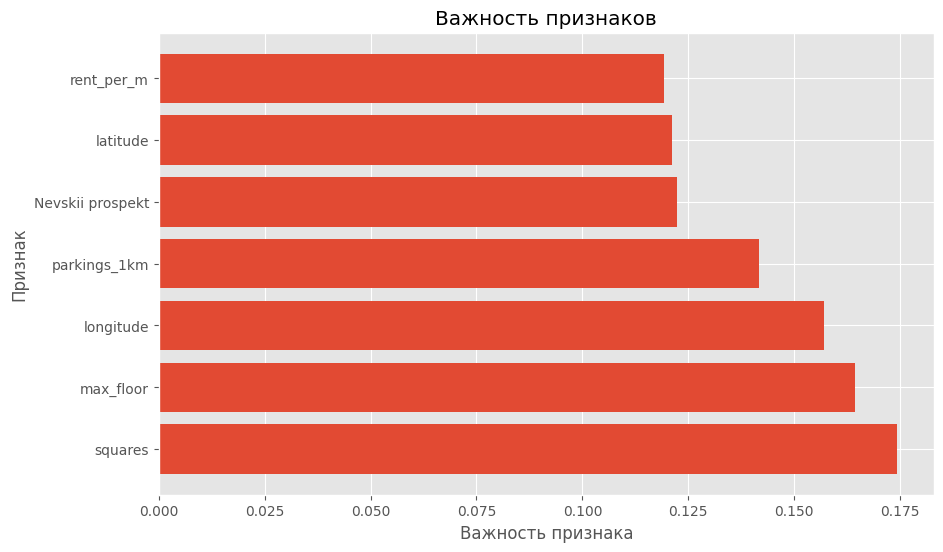

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков')
plt.show()

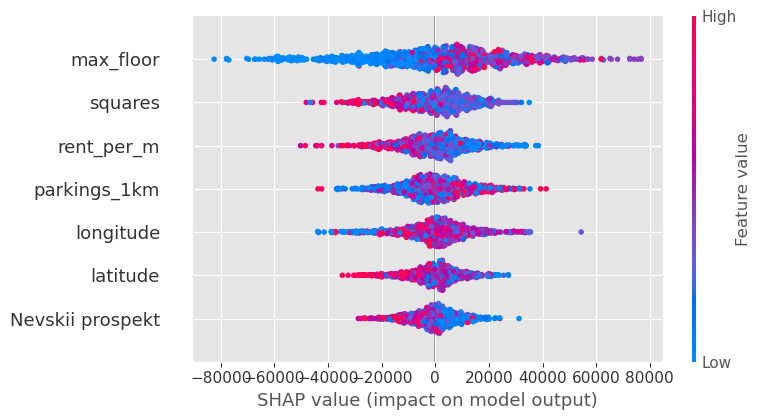

In [162]:
import shap

explainer = shap.Explainer(rfc)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [166]:

shap_means = (shap_values).mean(axis=0)

# Вывод средних значений SHAP
for name, mean_shap in zip(X_train.columns, shap_means):
    print(f"{name}: {mean_shap}")

squares: -249.23901994241965
max_floor: 1276.5556238794757
latitude: -303.72975503872203
longitude: 212.51598226429866
Nevskii prospekt: -404.61310787661506
parkings_1km: -331.0429678188967
rent_per_m: -200.4467554670897


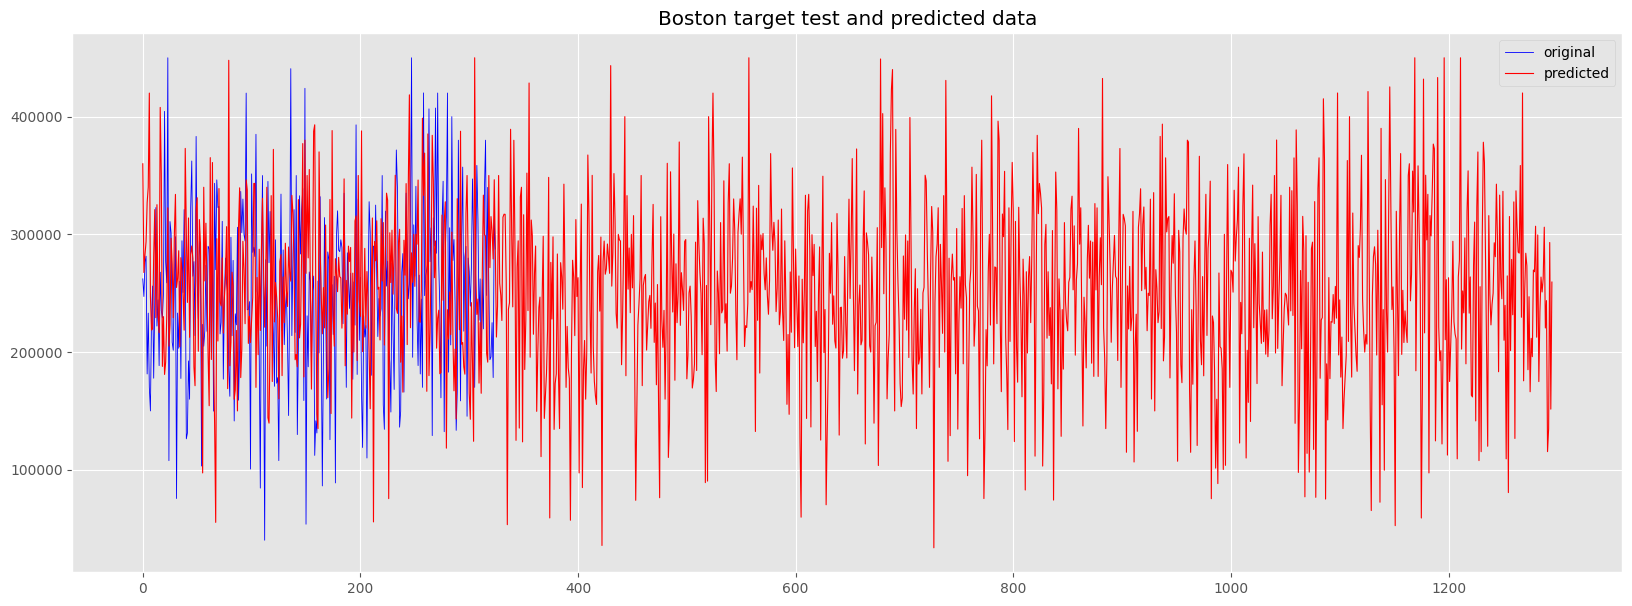

In [27]:
x_ax = range(len(y_train))
x_ax1 = range(len(y_test))
plt.figure(figsize = (20,7))
plt.plot(x_ax1, y_test, lw=0.6, color="blue", label="original")
plt.plot(x_ax, y_train, lw=0.8, color="red", label="predicted")
plt.title("Boston target test and predicted data")
plt.legend()
plt.show()

In [28]:
data

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m
0,311480.0,131.63,2.0,30.082621,59.724677,28.29,47.0,196596.0
1,254997.0,145.10,5.0,30.316138,59.911854,1.73,55.0,318800.0
2,353742.0,73.50,7.0,30.301127,59.912368,3.13,55.0,130418.0
3,190000.0,33.90,9.0,30.449978,59.956836,13.70,15.0,92376.0
4,166667.0,89.40,5.0,30.325543,59.926372,0.50,26.0,99886.0
...,...,...,...,...,...,...,...,...
1645,246276.8,140.00,2.0,30.307011,59.930764,2.27,38.0,220000.0
1646,208227.6,150.00,12.0,30.507551,59.831924,20.97,35.0,265000.0
1647,236645.0,162.00,20.0,30.260523,59.928834,7.43,29.0,291600.0
1648,192514.8,112.00,5.0,30.249204,59.937639,8.68,50.0,150000.0


# Добавление популяции по районам

Мы берем фиктивные переменные по районам, затем согласно ним присоединяем в столбец популяции данные по соответствующему району

In [29]:
data.reset_index(inplace=True)

In [30]:
data=data[['price_per_square', 'squares', 'max_floor',
       'latitude', 'longitude','Nevskii prospekt','parkings_1km','rent_per_m']]

In [31]:
data

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m
0,311480.0,131.63,2.0,30.082621,59.724677,28.29,47.0,196596.0
1,254997.0,145.10,5.0,30.316138,59.911854,1.73,55.0,318800.0
2,353742.0,73.50,7.0,30.301127,59.912368,3.13,55.0,130418.0
3,190000.0,33.90,9.0,30.449978,59.956836,13.70,15.0,92376.0
4,166667.0,89.40,5.0,30.325543,59.926372,0.50,26.0,99886.0
...,...,...,...,...,...,...,...,...
1616,246276.8,140.00,2.0,30.307011,59.930764,2.27,38.0,220000.0
1617,208227.6,150.00,12.0,30.507551,59.831924,20.97,35.0,265000.0
1618,236645.0,162.00,20.0,30.260523,59.928834,7.43,29.0,291600.0
1619,192514.8,112.00,5.0,30.249204,59.937639,8.68,50.0,150000.0


In [34]:
rk = pd.read_csv(r'E:\diplomopis\spb_geo\boundary-polygon-lvl5.csv')

In [35]:
rk.columns

Index(['WKT\tNAME\tNAME_EN\tNAME_RU\tADMIN_LVL\tOSM_TYPE\tOSM_ID\tADMIN_L1D\tADMIN_L1\tADMIN_L2D\tADMIN_L2\tADMIN_L3D\tADMIN_L3\tADMIN_L4D\tADMIN_L4\tADMIN_L5D\tADMIN_L5\tADMIN_L6D\tADMIN_L6\tADMIN_L7D\tADMIN_L7\tADMIN_L8D\tADMIN_L8\tADMIN_L9D\tADMIN_L9\tADMIN_L10D\tADMIN_L10\toktmo\tokato'], dtype='object')

In [36]:
rk = rk.rename(columns={'WKT\tNAME\tNAME_EN\tNAME_RU\tADMIN_LVL\tOSM_TYPE\tOSM_ID\tADMIN_L1D\tADMIN_L1\tADMIN_L2D\tADMIN_L2\tADMIN_L3D\tADMIN_L3\tADMIN_L4D\tADMIN_L4\tADMIN_L5D\tADMIN_L5\tADMIN_L6D\tADMIN_L6\tADMIN_L7D\tADMIN_L7\tADMIN_L8D\tADMIN_L8\tADMIN_L9D\tADMIN_L9\tADMIN_L10D\tADMIN_L10\toktmo\tokato':'polygon'})

In [37]:
rk.iat[3,0]

'MULTIPOLYGON (((30.0650571 59.6683027,30.065326 59.6763773,30.065169 59.677984,30.0728262 59.6797451,30.0839517 59.6802946,30.082713 59.6760822,30.073311 59.6673744,30.0650571 59.6683027)),((30.2543397 59.8315508,30.2560398 59.8319556,30.2629599 59.8335731,30.26819 59.834854,30.2685455 59.8349407,30.2646724 59.8327226,30.2546514 59.8268597,30.2488545 59.8234676,30.2487752 59.8234209,30.2479055 59.8229036,30.247513 59.8226702,30.2445733 59.8191429,30.2399944 59.8130276,30.2392089 59.8130603,30.2391634 59.8130537,30.2384804 59.812954,30.2371781 59.812764,30.2356037 59.8128514,30.2275238 59.8132997,30.2273363 59.8132788,30.2265293 59.8130775,30.2248991 59.8124517,30.2242176 59.81219,30.2241067 59.8111565,30.2238548 59.8088086,30.2237596 59.8088099,30.222713 59.8088244,30.2225483 59.8087834,30.2223541 59.8085762,30.2206025 59.8051283,30.2207709 59.8049837,30.2205453 59.804902,30.220465 59.8048726,30.2202699 59.8048019,30.2203633 59.8047367,30.2193424 59.802629,30.217231 59.8022966,30.2175

In [38]:
districts = []

for i in range (18):
    string = rk.iat[i,0]

    # Разделение строки по табуляции и выбор английского значения
    english_value = string.split('\t')[2]

    # Удаление лишних пробелов и символов переноса строки
    english_value = english_value.strip()
    english_value = english_value.replace(' District','')

    # Вывод результата
    districts.append(english_value)


In [39]:
districts

['Kolpinsky',
 'Pushkinsky',
 'Moskovsky',
 'Krasnoselsky',
 'Petrodvortsovy',
 'Nevsky',
 'Frunzensky',
 'Admiralteysky',
 'Vasileostrovsky',
 'Vyborgsky',
 'Kalininsky',
 'Kirovsky',
 'Krasnogvardeysky',
 'Tsentralny',
 'Petrogradsky',
 'Kronshtadtsky',
 'Kurortny',
 'Primorsky']

In [40]:
data[districts] = 0

In [41]:
len(data)

1621

In [43]:
pip install shapely

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 667.8 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 1.4 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.4 MB 1.5 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 1.4 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 1.2 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.4 MB 1.2 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 1.3 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.4 MB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 1.4 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.4 MB 1.4 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 MB 1.4 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 MB 1.3 MB/s eta 0:00:01
   --------------

In [44]:
from shapely.geometry import Point, Polygon
from shapely.wkt import loads

In [45]:
rk['polygon'] = rk['polygon'].apply(loads)

In [46]:
def point_in_polygon(point):
    for polygon in range(len(rk['polygon'])):
        if rk['polygon'].iloc[polygon].contains(point):
            data[districts[polygon]][i] = 1
    return False

In [47]:
global i
for i in range(1621):
        point_in_polygon(Point(data.iat[i,3],data.iat[i,4]))


In [49]:
data

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,Kolpinsky,Pushkinsky,...,Vasileostrovsky,Vyborgsky,Kalininsky,Kirovsky,Krasnogvardeysky,Tsentralny,Petrogradsky,Kronshtadtsky,Kurortny,Primorsky
0,311480.0,131.63,2.0,30.082621,59.724677,28.29,47.0,196596.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,254997.0,145.10,5.0,30.316138,59.911854,1.73,55.0,318800.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,353742.0,73.50,7.0,30.301127,59.912368,3.13,55.0,130418.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,190000.0,33.90,9.0,30.449978,59.956836,13.70,15.0,92376.0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,166667.0,89.40,5.0,30.325543,59.926372,0.50,26.0,99886.0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,246276.8,140.00,2.0,30.307011,59.930764,2.27,38.0,220000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1617,208227.6,150.00,12.0,30.507551,59.831924,20.97,35.0,265000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1618,236645.0,162.00,20.0,30.260523,59.928834,7.43,29.0,291600.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1619,192514.8,112.00,5.0,30.249204,59.937639,8.68,50.0,150000.0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [48]:
distr_df = pd.read_csv(r'E:\diplomopis\districts\districts.csv', sep = ' ')
distr_df

,district,population
0,Admiralteysky,155981
1,Vasileostrovsky,206680
2,Vyborgsky,541590
3,Kalininsky,536794
4,Kirovsky,335774
5,Kolpinsky,186169
6,Krasnogvardeysky,366971
7,Krasnoselsky,431546
8,Kronshtadtsky,44414
9,Kurortny,83491


In [50]:
data.columns

Index(['price_per_square', 'squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'Kolpinsky',
       'Pushkinsky', 'Moskovsky', 'Krasnoselsky', 'Petrodvortsovy', 'Nevsky',
       'Frunzensky', 'Admiralteysky', 'Vasileostrovsky', 'Vyborgsky',
       'Kalininsky', 'Kirovsky', 'Krasnogvardeysky', 'Tsentralny',
       'Petrogradsky', 'Kronshtadtsky', 'Kurortny', 'Primorsky'],
      dtype='object')

In [51]:
data[districts].sum(axis=0)

Kolpinsky             5
Pushkinsky           94
Moskovsky           126
Krasnoselsky        100
Petrodvortsovy       10
Nevsky               86
Frunzensky           75
Admiralteysky       140
Vasileostrovsky     117
Vyborgsky           148
Kalininsky           80
Kirovsky             36
Krasnogvardeysky    102
Tsentralny          204
Petrogradsky         96
Kronshtadtsky         0
Kurortny              2
Primorsky           200
dtype: int64

In [ ]:
# disls = ['Primorsky',
#        'Tsentralny', 'Kalininsky', 'Krasnogvardeysky', 'Admiralteysky',
#        'Vyborgsky', 'Frunzensky', 'Nevsky', 'Petrogradsky', 'Vasileostrovsky',
#        'Krasnoselsky', 'Moskovsky']

In [ ]:
# data['in_diss'] = data[disls].sum(axis=1)

In [ ]:
# data[data['in_diss'] == 0].to_csv('not_in_districts.csv',encoding = 'utf-8')

In [ ]:
# df.sum(axis = 0)

In [52]:
rem_cols = ['Kolpinsky','Kronshtadtsky','Kurortny','Petrodvortsovy']

In [53]:
data = data.drop(rem_cols, axis=1)

In [ ]:
# data = data[data['Pushkinsky'] == 0]
# data = data[data['Kirovsky'] == 0]

In [54]:
len(data)

1621

In [ ]:
# rem_cols = ['Kirovsky','Pushkinsky']

In [ ]:
# data = data.drop(rem_cols, axis=1)

In [55]:
data.columns

Index(['price_per_square', 'squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'Pushkinsky',
       'Moskovsky', 'Krasnoselsky', 'Nevsky', 'Frunzensky', 'Admiralteysky',
       'Vasileostrovsky', 'Vyborgsky', 'Kalininsky', 'Kirovsky',
       'Krasnogvardeysky', 'Tsentralny', 'Petrogradsky', 'Primorsky'],
      dtype='object')

In [57]:
rem_rows = ['Kolpinsky','Kronshtadtsky','Kurortny','Petrodvortsovy']

In [58]:
distr_df = distr_df[~distr_df.district.isin(rem_rows)]

In [59]:
data['population'] = 0

In [60]:
data.describe()

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,Pushkinsky,Moskovsky,...,Admiralteysky,Vasileostrovsky,Vyborgsky,Kalininsky,Kirovsky,Krasnogvardeysky,Tsentralny,Petrogradsky,Primorsky,population
count,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,...,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.0
mean,251840.213202,92.894978,9.297347,30.319440,59.928099,8.471289,44.637261,172983.700062,0.057989,0.077730,...,0.086366,0.072178,0.091302,0.049352,0.022209,0.062924,0.125848,0.059223,0.123381,0.0
std,73476.764815,45.905986,7.842456,0.090560,0.077891,6.785169,22.619268,93093.757030,0.233795,0.267829,...,0.280991,0.258862,0.288127,0.216669,0.147407,0.242901,0.331781,0.236114,0.328975,0.0
min,33750.000000,4.000000,1.000000,29.766935,59.702404,0.120000,1.000000,20000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,204869.600000,58.000000,3.000000,30.274698,59.880582,3.590000,27.000000,101418.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,253343.200000,86.000000,6.000000,30.326055,59.933190,7.000000,41.000000,152640.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,299726.000000,123.600000,14.000000,30.371330,59.982154,11.660000,59.000000,228240.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,450000.000000,200.000000,28.000000,30.583368,60.110679,62.310000,125.000000,450000.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [61]:
data['mean_distr_pps'] = 0.0

In [62]:

for i in range(len(distr_df)):
    print(distr_df.iat[i,0])
    data.loc[data[distr_df.iat[i, 0]] == 1, 'population'] = distr_df.iat[i,1]
    data.loc[data[distr_df.iat[i, 0]] == 1, 'mean_distr_pps'] = data.loc[data[distr_df.iat[i, 0]] == 1, 'price_per_square'].mean()

Admiralteysky
Vasileostrovsky
Vyborgsky
Kalininsky
Kirovsky
Krasnogvardeysky
Krasnoselsky
Moskovsky
Nevsky
Petrogradsky
Primorsky
Pushkinsky
Frunzensky
Tsentralny


In [63]:
data.loc[data['Tsentralny'] == 1, 'price_per_square'].mean()

244764.85882352942

In [65]:
data.sort_values(by='population',ascending=True).head(20)

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,Pushkinsky,Moskovsky,...,Vasileostrovsky,Vyborgsky,Kalininsky,Kirovsky,Krasnogvardeysky,Tsentralny,Petrogradsky,Primorsky,population,mean_distr_pps
1113,251315.6,76.0,18.0,30.583368,59.736004,31.08,25.0,170000.0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1472,259467.4,74.0,10.0,30.575661,59.736081,30.27,19.0,170000.0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1217,218975.6,120.0,3.0,30.006264,60.054693,35.88,9.0,336000.0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1488,253445.6,88.0,2.0,30.087049,59.849609,26.90,12.0,170000.0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1379,293398.4,130.0,12.0,30.087049,59.849609,26.90,12.0,360000.0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1581,260448.4,147.0,18.0,29.913872,59.870072,45.99,17.0,180000.0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1397,259467.4,80.0,14.0,30.006129,60.053638,35.89,9.0,184722.0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1569,171481.6,170.0,5.0,29.913872,59.870072,45.99,17.0,450000.0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1142,253343.2,81.1,27.0,29.770474,59.902172,61.91,29.0,89000.0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
690,261628.0,86.0,4.0,30.087049,59.849609,26.90,12.0,144000.0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [66]:
data = data[data['population'] != 0]

In [67]:
data.describe()

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,Pushkinsky,Moskovsky,...,Vasileostrovsky,Vyborgsky,Kalininsky,Kirovsky,Krasnogvardeysky,Tsentralny,Petrogradsky,Primorsky,population,mean_distr_pps
count,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,...,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000
mean,251845.132045,92.900848,9.286783,30.321618,59.928825,8.127849,44.900249,172785.277930,0.058603,0.078554,...,0.072943,0.092269,0.049875,0.022444,0.063591,0.127182,0.059850,0.124688,373368.060474,251845.132045
std,73790.747999,46.006854,7.843370,0.082273,0.077338,5.773234,22.569005,92971.298933,0.234954,0.269125,...,0.260123,0.289496,0.217755,0.148168,0.244099,0.333281,0.237283,0.330468,184111.308526,17379.966929
min,33750.000000,4.000000,1.000000,30.071760,59.702404,0.120000,1.000000,20000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115757.000000,214227.693617
25%,204708.800000,58.000000,3.000000,30.276001,59.880582,3.570000,27.000000,101383.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200654.000000,236967.593023
50%,253020.500000,86.000000,6.000000,30.326262,59.934100,6.995000,41.000000,152050.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,335774.000000,249123.504286
75%,300000.000000,123.622500,14.000000,30.371330,59.983508,11.410000,59.000000,228555.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,541590.000000,266189.335417
max,450000.000000,200.000000,28.000000,30.518780,60.110679,29.350000,125.000000,450000.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,699243.000000,282621.495238


In [68]:
data.reset_index(inplace=True,drop='index')

In [69]:
df_2 = data.copy()

In [52]:
X = df_2[['squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'population','mean_distr_pps']]
y = df_2['price_per_square']

In [86]:
# Load libraries
import os
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [ ]:
df_2.corr()

In [70]:
df_2.columns

Index(['price_per_square', 'squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'Pushkinsky',
       'Moskovsky', 'Krasnoselsky', 'Nevsky', 'Frunzensky', 'Admiralteysky',
       'Vasileostrovsky', 'Vyborgsky', 'Kalininsky', 'Kirovsky',
       'Krasnogvardeysky', 'Tsentralny', 'Petrogradsky', 'Primorsky',
       'population', 'mean_distr_pps'],
      dtype='object')

In [73]:
# Split-out validation dataset
X = df_2[['squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'population','mean_distr_pps']]
Y = df_2['price_per_square']
validation_size = 0.3
seed = 999
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [74]:
for i in data.columns:
    correlation, p_value = pearsonr(data['price_per_square'], data[i])
    if p_value >= 0.05:
        print(f"{i}: correlation={correlation}, p-value={p_value}")

Krasnoselsky: correlation=0.00251311218160098, p-value=0.9198904165926028
Nevsky: correlation=-0.04800405735449703, p-value=0.05458432427262893
Frunzensky: correlation=0.015596002093949228, p-value=0.5325156738910626
Admiralteysky: correlation=-0.011409213665482053, p-value=0.6479605270203026
Vasileostrovsky: correlation=0.034881880508924816, p-value=0.16260790154870466
Kalininsky: correlation=0.03832410150482589, p-value=0.12496911345613941
Kirovsky: correlation=-0.03503559815900371, p-value=0.1607626203332215
Tsentralny: correlation=-0.03663823897269293, p-value=0.14245527920810444
population: correlation=0.03865769548737486, p-value=0.12171598244967756


In [98]:
data1 = data[data['Kalininsky'] !=1]
data1 = data[data['Admiralteysky'] !=1]
data1 = data[data['Frunzensky'] !=1]
data1 = data[data['Vasileostrovsky'] !=1]
data1 = data[data['Krasnoselsky'] !=1]
data1 = data[data['Kirovsky'] !=1]
data1.drop(columns = ['Kalininsky','Admiralteysky','Frunzensky','Vasileostrovsky','Krasnoselsky','Kirovsky'],inplace=True)

In [99]:
data1

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,Pushkinsky,Primorsky,Tsentralny,Krasnogvardeysky,Vyborgsky,Nevsky,Petrogradsky,Moskovsky,population,mean_distr_pps
0,246533.6,1.0,3.0,30.335685,60.030204,5.01,57.0,19999.0,0,0,0,0,1,0,0,0,541590,236507.113253
1,252437.2,2.0,1.0,30.317539,59.840659,4.96,53.0,8000.0,0,0,0,0,0,0,0,1,335221,276841.921739
2,243426.8,2.0,6.0,30.299321,60.001671,4.55,74.0,7350.0,0,1,0,0,0,0,0,0,699243,269920.705778
3,265627.4,2.0,6.0,30.444687,60.036034,14.26,24.0,7350.0,0,0,0,1,0,0,0,0,366971,235136.752212
4,249730.0,3.5,5.0,30.488947,59.841089,18.81,31.0,25000.0,0,0,0,0,0,1,0,0,547896,233645.419802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,209860.0,624.0,6.0,30.361844,59.809202,7.74,24.0,436800.0,1,0,0,0,0,0,0,0,263732,216441.671698
1810,270300.0,626.4,1.0,30.295422,59.999638,4.78,69.0,500000.0,0,1,0,0,0,0,0,0,699243,269920.705778
1812,209860.0,714.2,1.0,30.451406,59.892595,14.02,31.0,135698.0,0,0,0,0,0,1,0,0,547896,233645.419802
1813,281300.0,715.6,1.0,30.386943,59.832059,8.70,59.0,135964.0,0,0,0,0,0,0,0,0,413983,254696.639024


In [95]:
data[data['Vasileostrovsky'] !=1]

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,Pushkinsky,Primorsky,...,Vyborgsky,Frunzensky,Nevsky,Petrogradsky,Vasileostrovsky,Krasnoselsky,Kirovsky,Moskovsky,population,mean_distr_pps
0,246533.6,1.0,3.0,30.335685,60.030204,5.01,57.0,19999.0,0,0,...,1,0,0,0,0,0,0,0,541590,236507.113253
1,252437.2,2.0,1.0,30.317539,59.840659,4.96,53.0,8000.0,0,0,...,0,0,0,0,0,0,0,1,335221,276841.921739
2,243426.8,2.0,6.0,30.299321,60.001671,4.55,74.0,7350.0,0,1,...,0,0,0,0,0,0,0,0,699243,269920.705778
3,265627.4,2.0,6.0,30.444687,60.036034,14.26,24.0,7350.0,0,0,...,0,0,0,0,0,0,0,0,366971,235136.752212
4,249730.0,3.5,5.0,30.488947,59.841089,18.81,31.0,25000.0,0,0,...,0,0,1,0,0,0,0,0,547896,233645.419802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,270300.0,626.4,1.0,30.295422,59.999638,4.78,69.0,500000.0,0,1,...,0,0,0,0,0,0,0,0,699243,269920.705778
1811,209860.0,650.0,5.0,30.261969,59.852335,8.29,32.0,422500.0,0,0,...,0,0,0,0,0,0,1,0,335774,235598.569811
1812,209860.0,714.2,1.0,30.451406,59.892595,14.02,31.0,135698.0,0,0,...,0,0,1,0,0,0,0,0,547896,233645.419802
1813,281300.0,715.6,1.0,30.386943,59.832059,8.70,59.0,135964.0,0,0,...,0,1,0,0,0,0,0,0,413983,254696.639024


In [100]:
df_2=data1.copy()

In [ ]:
'Kalininsky','Admiralteysky','Frunzensky','Vasileostrovsky','Krasnoselsky','Kirovsky'

In [235]:
# Split-out validation dataset
X = df[['squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'Primorsky',
       'Tsentralny', 'Krasnogvardeysky','Vyborgsky', 'Nevsky', 'Petrogradsky', 'population','mean_distr_pps','pub_trans_1km']]
Y = df['price_per_square']


In [213]:
df_2

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,Pushkinsky,Primorsky,Tsentralny,Krasnogvardeysky,Vyborgsky,Nevsky,Petrogradsky,Moskovsky,population,mean_distr_pps
0,246533.6,1.0,3.0,30.335685,60.030204,5.01,57.0,19999.0,0,0,0,0,1,0,0,0,541590,236507.113253
1,252437.2,2.0,1.0,30.317539,59.840659,4.96,53.0,8000.0,0,0,0,0,0,0,0,1,335221,276841.921739
2,243426.8,2.0,6.0,30.299321,60.001671,4.55,74.0,7350.0,0,1,0,0,0,0,0,0,699243,269920.705778
3,265627.4,2.0,6.0,30.444687,60.036034,14.26,24.0,7350.0,0,0,0,1,0,0,0,0,366971,235136.752212
4,249730.0,3.5,5.0,30.488947,59.841089,18.81,31.0,25000.0,0,0,0,0,0,1,0,0,547896,233645.419802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,209860.0,624.0,6.0,30.361844,59.809202,7.74,24.0,436800.0,1,0,0,0,0,0,0,0,263732,216441.671698
1810,270300.0,626.4,1.0,30.295422,59.999638,4.78,69.0,500000.0,0,1,0,0,0,0,0,0,699243,269920.705778
1812,209860.0,714.2,1.0,30.451406,59.892595,14.02,31.0,135698.0,0,0,0,0,0,1,0,0,547896,233645.419802
1813,281300.0,715.6,1.0,30.386943,59.832059,8.70,59.0,135964.0,0,0,0,0,0,0,0,0,413983,254696.639024


In [75]:
for i in df_2.columns:
    print(f"{i}:{pearsonr(df_2['price_per_square'], df_2[i])}")

price_per_square:PearsonRResult(statistic=1.0, pvalue=0.0)
squares:PearsonRResult(statistic=-0.11874077529252212, pvalue=1.8538488440690614e-06)
max_floor:PearsonRResult(statistic=0.22328525601010069, pvalue=1.4285238358043977e-19)
latitude:PearsonRResult(statistic=-0.05810192138599804, pvalue=0.01995823497773295)
longitude:PearsonRResult(statistic=0.048992828630411024, pvalue=0.04978464261296872)
Nevskii prospekt:PearsonRResult(statistic=-0.13247430273421207, pvalue=1.0098641219919911e-07)
parkings_1km:PearsonRResult(statistic=0.09232892161552676, pvalue=0.0002132337484133239)
rent_per_m:PearsonRResult(statistic=-0.10455435480645685, pvalue=2.7210470024049496e-05)
Pushkinsky:PearsonRResult(statistic=-0.12723253494816888, pvalue=3.1796247813770777e-07)
Moskovsky:PearsonRResult(statistic=0.12181446497656731, pvalue=9.926285967984666e-07)
Krasnoselsky:PearsonRResult(statistic=0.00251311218160098, pvalue=0.9198904165926028)
Nevsky:PearsonRResult(statistic=-0.04800405735449703, pvalue=0.05

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 999)

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

rfc = ExtraTreesRegressor(n_estimators=100)
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

0.999657548241919

In [78]:
predictions1 = rfc.predict(X_train)
#Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_train, predictions1))
print(rmse)
print(mean_absolute_error(y_train, predictions1))
print(mean_absolute_percentage_error(y_train, predictions1))

1358.5312725253925
66.54583008589285
0.00020353779615776718


In [79]:
# transform the validation dataset
display(rfc.score(X_test, y_test))
rescaledValidationX = X_test
predictions = rfc.predict(rescaledValidationX)
print(mean_squared_error(y_test, predictions))
print(mean_absolute_error(y_test, predictions))
print(mean_absolute_percentage_error(y_test, predictions))

0.43014857883100266

3201315060.3635826
40625.3676199377
0.2012000606898439


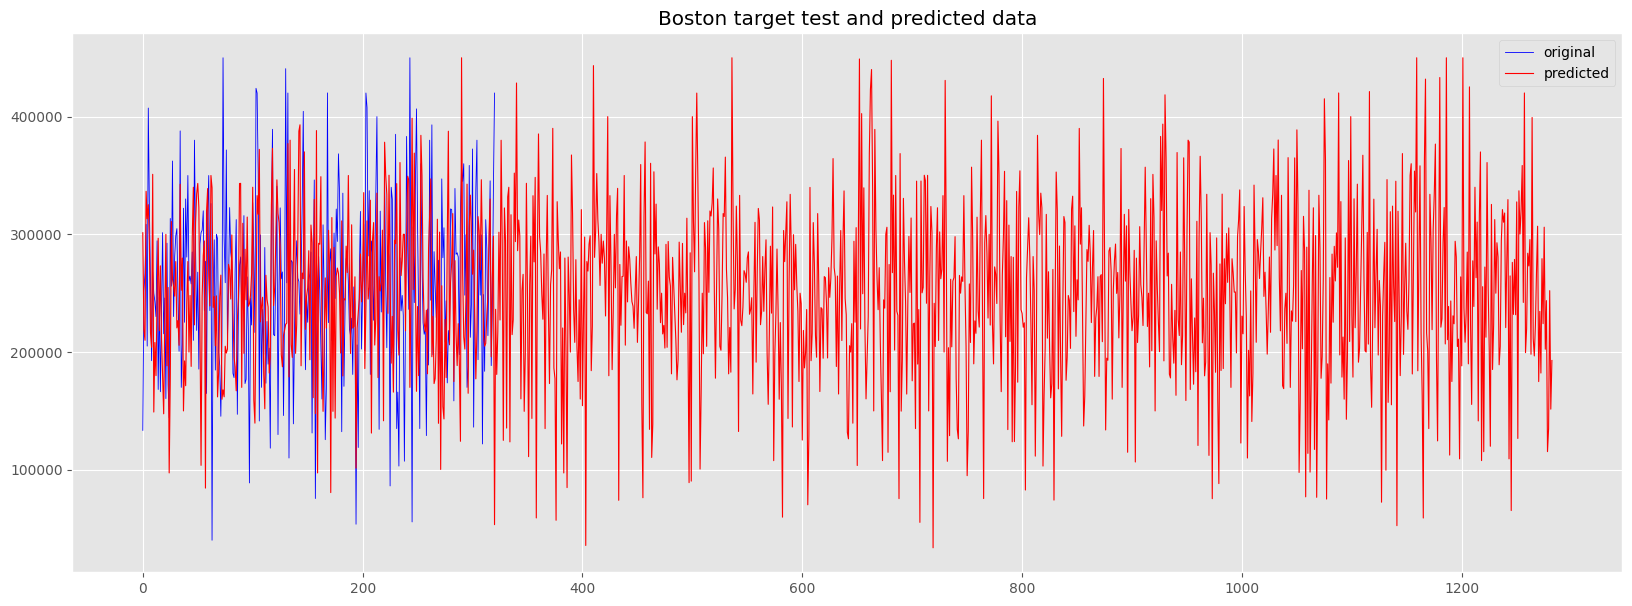

In [80]:
x_ax = range(len(y_train))
x_ax1 = range(len(y_test))
plt.figure(figsize = (20,7))
plt.plot(x_ax1, y_test, lw=0.6, color="blue", label="original")
plt.plot(x_ax, y_train, lw=0.8, color="red", label="predicted")
plt.title("Boston target test and predicted data")
plt.legend()
plt.show()

In [ ]:
data.iloc[5,:]

In [ ]:
[215518.000000,
11.600000,
4.000000,
30.305502,
59.929623,
2.440000,
43.000000,
16711.000000,
0.000000,
0.000000,
0.000000,
0.000000,
1.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
155981.000000,
239806.104651]

In [ ]:
rfc

In [ ]:
factors = [[11.600000,
4.000000,
30.305502,
59.929623,
2.440000,
43.000000,
16711.000000,
0.000000,
0.000000,
0.000000,
0.000000,
1.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
155981.000000,
239806.104651]]  # Example list of factors

# Make predictions
pep = rfc.predict(factors)

# Print or use the forecasted values
print("Forecasted Values:", pep)

In [ ]:
data.columns

In [ ]:
data[data['Frunzensky']==1]

In [73]:
factors = [[119.300000,
11.000000,
30.342404,
59.905357,
3.477,
17.000000,
200711.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
1.000000,
0.000000,
0.000000,
0.000000,
0.000000,
413983.000000,
239806.104651]]  # Example list of factors

# Make predictions
pep = rfc.predict(factors)

# Print or use the forecasted values
print("Forecasted Values:", pep)

Forecasted Values: [263958.008]


In [74]:
predictions2 = rfc.predict(X_test)
#Calculate the root mean squared error
display(rfc.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, predictions2))
print(rmse)
print(mean_absolute_error(y_test, predictions2))
print(mean_absolute_percentage_error(y_test, predictions2))

0.34289346762832706

57511.50459576421
42533.63970391062
0.20483356533770675


In [81]:
# Split-out validation dataset
X = df_2[['squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'population','mean_distr_pps']]
Y = df_2['price_per_square']


In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 999)

In [91]:
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

### 4. Evaluate Algorithms: Baseline

In [97]:
# Test options and evaluation metric
num_folds = 2
seed = 999
scoring = 'neg_mean_absolute_percentage_error'

In [98]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.289097 (0.019061)
LASSO: -0.289099 (0.019060)
EN: -0.289756 (0.019297)
KNN: -0.316207 (0.017898)
CART: -0.323256 (0.017128)
SVR: -0.317140 (0.020653)


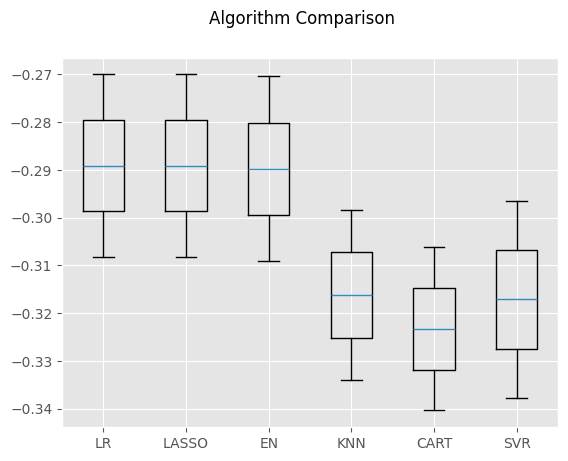

In [99]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 5. Evaluate Algorithms: Standardize Data

In [100]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.289097 (0.019061)
ScaledLASSO: -0.289098 (0.019060)
ScaledEN: -0.293463 (0.017921)
ScaledKNN: -0.289159 (0.016358)
ScaledCART: -0.321976 (0.021565)
ScaledSVR: -0.317121 (0.020645)


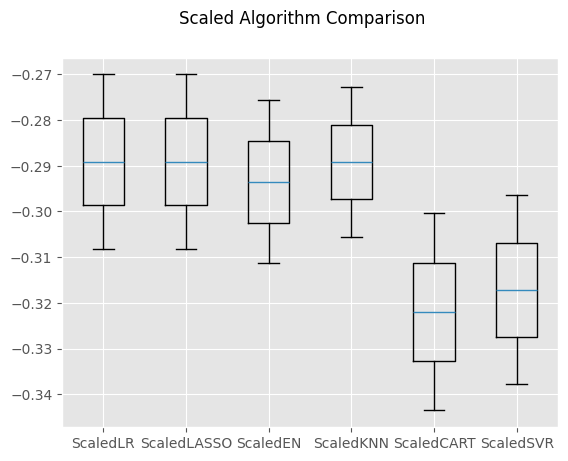

In [101]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 6. Algorithm Tuning

In [102]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
n_ests = numpy.array([50,100,150,200,250,300,350,400])
param_grid = dict(max_depth=k_values,n_estimators = n_ests)
model = ExtraTreesRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: 

### 7. Ensemble Methods

In [103]:
# ensembles
ensembles = []
ensembles.append(('AB',
AdaBoostRegressor()))
ensembles.append(('GBM',
GradientBoostingRegressor()))
ensembles.append(('RF',
RandomForestRegressor(n_estimators=10)))
ensembles.append(('ET',
ExtraTreesRegressor(n_estimators=100)))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: -0.284843 (0.017734)
GBM: -0.261771 (0.017516)
RF: -0.261280 (0.010913)
ET: -0.249112 (0.016624)


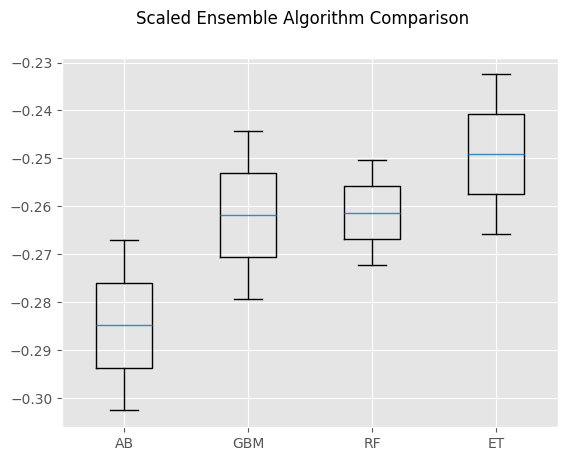

In [104]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [106]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

In [107]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.262159 using {'n_estimators': 100}
-0.267725 (0.016788) with: {'n_estimators': 50}
-0.262159 (0.017687) with: {'n_estimators': 100}
-0.262378 (0.016885) with: {'n_estimators': 150}
-0.262476 (0.015588) with: {'n_estimators': 200}
-0.263493 (0.014970) with: {'n_estimators': 250}
-0.265683 (0.014047) with: {'n_estimators': 300}
-0.266454 (0.013424) with: {'n_estimators': 350}
-0.267393 (0.013631) with: {'n_estimators': 400}


### 8. Finalize Model

In [108]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(random_state=seed, n_estimators=100)
model.fit(X_train, Y_train)

ExtraTreesRegressor(random_state=999)

In [109]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(X_validation)
print(mean_squared_error(Y_validation, predictions))
print(mean_absolute_error(Y_validation, predictions))
print(mean_absolute_percentage_error(Y_validation, predictions))

3464408566.1485963
44874.89362616822
0.20676539960629708


In [111]:
dataset = data[['price_per_square','squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'population','mean_distr_pps']]

In [114]:
dataset.to_csv('data_extended_2705.csv', encoding='utf-8')

In [115]:
dataset.corr()

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,population,mean_distr_pps
price_per_square,1.000000,-0.118741,0.223285,-0.058102,0.048993,-0.132474,0.092329,-0.104554,0.038658,0.235530
squares,-0.118741,1.000000,0.008038,-0.027928,0.042086,0.004918,0.025004,0.752755,0.005005,0.014158
max_floor,0.223285,0.008038,1.000000,-0.009747,0.104663,0.095532,-0.035330,0.025241,0.198377,0.001836
latitude,-0.058102,-0.027928,-0.009747,1.000000,-0.023184,-0.251295,-0.103826,-0.028180,-0.041129,-0.380650
longitude,0.048993,0.042086,0.104663,-0.023184,1.000000,-0.261518,0.228348,0.034749,0.389269,0.203532
Nevskii prospekt,-0.132474,0.004918,0.095532,-0.251295,-0.261518,1.000000,-0.298233,0.000477,0.308933,-0.181313
parkings_1km,0.092329,0.025004,-0.035330,-0.103826,0.228348,-0.298233,1.000000,0.032974,0.200176,0.347162
rent_per_m,-0.104554,0.752755,0.025241,-0.028180,0.034749,0.000477,0.032974,1.000000,0.049677,0.045131
population,0.038658,0.005005,0.198377,-0.041129,0.389269,0.308933,0.200176,0.049677,1.000000,0.164130
mean_distr_pps,0.235530,0.014158,0.001836,-0.380650,0.203532,-0.181313,0.347162,0.045131,0.164130,1.000000


In [116]:
for i in data.columns:
    print(f"{i}:{pearsonr(data['price_per_square'], data[i])}")

price_per_square:PearsonRResult(statistic=1.0, pvalue=0.0)
squares:PearsonRResult(statistic=-0.11874077529252212, pvalue=1.8538488440690614e-06)
max_floor:PearsonRResult(statistic=0.22328525601010069, pvalue=1.4285238358043977e-19)
latitude:PearsonRResult(statistic=-0.05810192138599804, pvalue=0.01995823497773295)
longitude:PearsonRResult(statistic=0.048992828630411024, pvalue=0.04978464261296872)
Nevskii prospekt:PearsonRResult(statistic=-0.13247430273421207, pvalue=1.0098641219919911e-07)
parkings_1km:PearsonRResult(statistic=0.09232892161552676, pvalue=0.0002132337484133239)
rent_per_m:PearsonRResult(statistic=-0.10455435480645685, pvalue=2.7210470024049496e-05)
Pushkinsky:PearsonRResult(statistic=-0.12723253494816888, pvalue=3.1796247813770777e-07)
Moskovsky:PearsonRResult(statistic=0.12181446497656731, pvalue=9.926285967984666e-07)
Krasnoselsky:PearsonRResult(statistic=0.00251311218160098, pvalue=0.9198904165926028)
Nevsky:PearsonRResult(statistic=-0.04800405735449703, pvalue=0.05

In [117]:
df = pd.read_csv('data_extended_2705.csv',index_col = 0)
df

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,population,mean_distr_pps
0,311480.0,131.63,2.0,30.082621,59.724677,28.29,47.0,196596.0,431546,252564.088000
1,254997.0,145.10,5.0,30.316138,59.911854,1.73,55.0,318800.0,155981,249123.504286
2,353742.0,73.50,7.0,30.301127,59.912368,3.13,55.0,130418.0,155981,249123.504286
3,190000.0,33.90,9.0,30.449978,59.956836,13.70,15.0,92376.0,366971,234417.049020
4,166667.0,89.40,5.0,30.325543,59.926372,0.50,26.0,99886.0,200654,244764.858824
...,...,...,...,...,...,...,...,...,...,...
1599,246276.8,140.00,2.0,30.307011,59.930764,2.27,38.0,220000.0,155981,249123.504286
1600,208227.6,150.00,12.0,30.507551,59.831924,20.97,35.0,265000.0,547896,236967.593023
1601,236645.0,162.00,20.0,30.260523,59.928834,7.43,29.0,291600.0,206680,261018.502564
1602,192514.8,112.00,5.0,30.249204,59.937639,8.68,50.0,150000.0,206680,261018.502564


In [118]:
pub_transp = pd.read_csv(r'E:\diplomopis\spb_geo\public-transport-point.csv',sep = '\t')

In [119]:
pub_transp

,X,Y,NAME,NAME_EN,NAME_RU,RAILWAY,HIGHWAY,REF,NETWORK,PUBLIC_TRA,OSM_TYPE,OSM_ID
0,30.464907,59.867661,проспект Обуховской обороны,NaN,NaN,NaN,bus_stop,NaN,NaN,platform,node,15499719
1,30.378129,59.831396,станция метро «Купчино»,NaN,NaN,tram_stop,NaN,NaN,NaN,stop_position,node,254943226
2,30.356159,59.879573,Волковский проспект,NaN,NaN,tram_stop,NaN,NaN,NaN,stop_position,node,255282238
3,30.335113,59.855108,проспект Юрия Гагарина,NaN,NaN,tram_stop,NaN,NaN,NaN,stop_position,node,255352756
4,30.388764,60.003996,Политехнический институт,NaN,NaN,NaN,bus_stop,NaN,NaN,platform,node,255479610
...,...,...,...,...,...,...,...,...,...,...,...,...
7078,30.386967,60.042285,улица Демьяна Бедного,NaN,NaN,NaN,NaN,NaN,NaN,platform,node,11042030325
7079,30.385907,60.042426,улица Демьяна Бедного,NaN,NaN,NaN,NaN,NaN,NaN,platform,node,11042030326
7080,30.438118,59.977885,Бестужевская улица,NaN,NaN,NaN,bus_stop,NaN,NaN,platform,node,11046965758
7081,30.239518,59.976214,Яхт-клуб,NaN,NaN,NaN,bus_stop,NaN,NaN,platform,node,11049312631


In [120]:
import math as m

In [121]:
df['pub_trans_1km'] = 0.0
for r in range(0,1604):
    for park in range(0,7083):
        distance = round(111.2 * m.acos((m.sin(df.iat[r,3]) * m.sin(pub_transp.iat[park,0]) + (m.cos(df.iat[r,3]) * m.cos(pub_transp.iat[park,0]) * m.cos(df.iat[r,4] - pub_transp.iat[park,1] ) ))),2)
        if distance <= 1.0:
            df.iat[r,-1] += 1


KeyboardInterrupt



In [232]:
for i in df.columns:
    print(f"{i}:{pearsonr(df['price_per_square'], df[i])}")

price_per_square:PearsonRResult(statistic=0.9999999999999997, pvalue=0.0)
squares:PearsonRResult(statistic=-0.11734039680720197, pvalue=6.417114412246304e-07)
max_floor:PearsonRResult(statistic=0.2022602973657715, pvalue=5.582834427692247e-18)
latitude:PearsonRResult(statistic=-0.06570525124170215, pvalue=0.005420058388835633)
longitude:PearsonRResult(statistic=0.06176014694143238, pvalue=0.008958274314402631)
Nevskii prospekt:PearsonRResult(statistic=-0.12217639296912275, pvalue=2.1611859234648797e-07)
parkings_1km:PearsonRResult(statistic=0.10768912367800786, pvalue=4.965141214139126e-06)
rent_per_m:PearsonRResult(statistic=-0.1227911097014038, pvalue=1.8762659580295052e-07)
Pushkinsky:PearsonRResult(statistic=-0.11976484814615286, pvalue=3.738373335779406e-07)
Primorsky:PearsonRResult(statistic=0.1049019580550408, pvalue=8.691259671649887e-06)
Tsentralny:PearsonRResult(statistic=-0.04659304847483915, pvalue=0.048727268803762644)
Kalininsky:PearsonRResult(statistic=0.0406572610298171

In [125]:
df.to_csv('almost_done_pub_trans.csv',encoding='utf-8')

: 